<a href="https://colab.research.google.com/github/rishikaa1/handwritten-digit-recognition/blob/main/rbf_kernel_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Loading the dataset

In [ ]:
from sklearn import datasets
digits =  datasets.load_digits()

Visualizing the first four images of the dataset

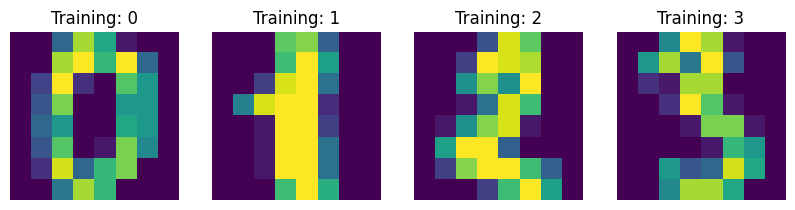

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image)
    ax.set_title("Training: %i" % label)

Visualizing random images of the dataset

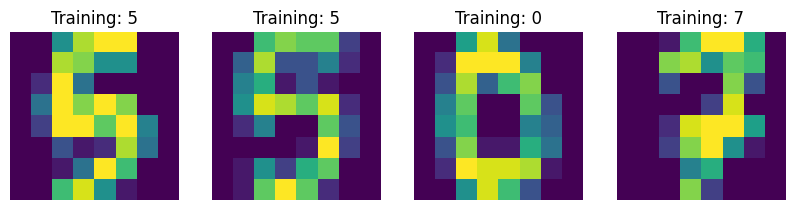

In [ ]:
random_indices = np.random.choice(len(digits.images), size=4, replace=False)
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, i in zip(axes, random_indices):
    image = digits.images[i]
    label = digits.target[i]
    ax.set_axis_off()
    ax.imshow(image)
    ax.set_title("Training: %i" % label)

plt.show()

Preprocessing the dataset

In [ ]:
data = digits.images.reshape(len(digits.images),-1)

Splitting dataset into Training set an Test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( data, digits.target, test_size=0.5, shuffle=True)

Training the Logistic Regression Model on the training set

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC()

Predicting Test set Result

In [ ]:
y_pred = classifier.predict(X_test)

Visualizing first five test samples and showing their predicted value

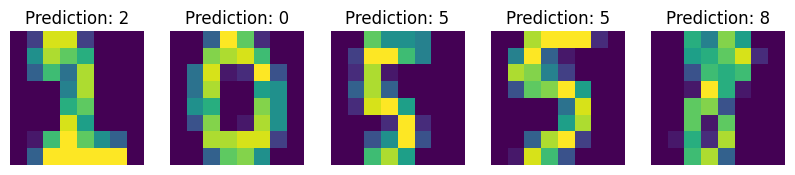

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image)
    ax.set_title(f"Prediction: {prediction}")

Displaying the Confusion Matrix

Confusion matrix:
[[ 90   0   0   0   0   0   0   0   0   0]
 [  0  88   0   0   0   0   0   0   0   0]
 [  0   0  98   0   0   0   0   0   0   0]
 [  0   0   0  82   0   1   0   1   0   0]
 [  0   0   0   0  88   0   0   0   3   0]
 [  0   0   0   0   0  92   1   0   0   1]
 [  0   1   0   0   0   0  81   0   1   0]
 [  0   0   0   0   0   0   0 101   0   1]
 [  0   3   0   0   0   0   0   0  78   1]
 [  0   0   0   0   0   1   0   0   1  85]]


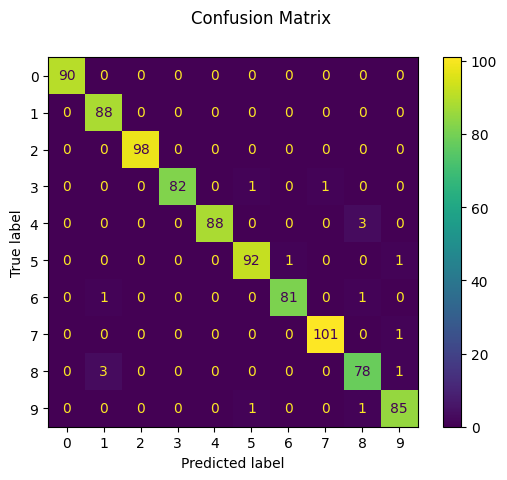

In [ ]:
import sklearn.metrics as metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.982202447163515